In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [3]:
NUM_DATASETS = 50
NOISE_VARIANCE = 0.5
MAX_POLY = 12
N = 25
N_train = int(0.9 * N)  # 90 % of Data

np.random.seed(2)

Make dataset with x^D, x^(D-1), ..., x^0

In [10]:
def make_poly(x, D):
    N = len(x)
    X = np.empty((N, D+1))  # +1 for bias
    for d in range(D+1):
        X[:, d] = x**d
        if d > 1:
            # Normalize
            X[:, d] = (X[:, d] - X[:, d].mean()) / X[:, d].std()
    return X

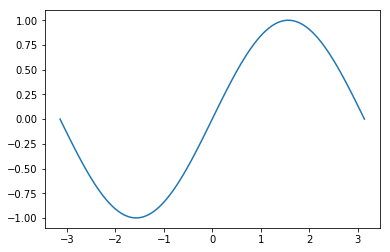

In [6]:
def f(x):
    return np.sin(x)

x_axis = np.linspace(-np.pi, np.pi, 100)
y_axis = f(x_axis)

plt.plot(x_axis, y_axis)

Define Dataset X with N points (25 points)

In [11]:
X = np.linspace(-np.pi, np.pi, N)
np.random.shuffle(X)
f_X = f(X)

X_poly = make_poly(X, MAX_POLY)

In [12]:
train_scores = np.zeros((NUM_DATASETS, MAX_POLY))
test_scores = np.zeros((NUM_DATASETS, MAX_POLY))
train_predictions = np.zeros((N_train, NUM_DATASETS, MAX_POLY))
prediction_curves = np.zeros((100, NUM_DATASETS, MAX_POLY))

In [13]:
model = LinearRegression()

In [24]:
for k in range(NUM_DATASETS):
    Y = f_X + np.random.randn(N) * NOISE_VARIANCE
    
    X_train = X_poly[:N_train]
    Y_train = Y[:N_train]
    
    X_test = X_poly[N_train:]
    Y_test = Y[N_train:]
    
    for d in range(MAX_POLY):
        model.fit(X_train[:, :d+2], Y_train)
        predictions = model.predict(X_poly[:, :d+2])
        
        x_axis_poly = make_poly(x_axis, d+1)
        prediction_axis = model.predict(x_axis_poly)
        
        prediction_curves[:, k, d] = prediction_axis
        
        train_prediction = predictions[:N_train]
        test_prediction = predictions[N_train:]
        
        train_predictions[:, k, d] = train_prediction
        
        train_score = mse(train_prediction, Y_train)
        test_score = mse(test_prediction, Y_test)
        
        train_scores[k, d] = train_score
        test_scores[k, d] = test_score

Show all prediction curves for each polynomial degree along with mean curve

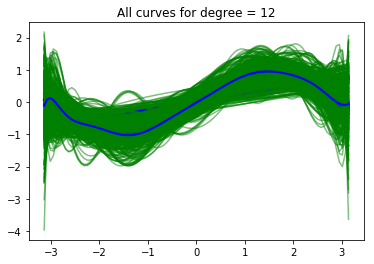

In [25]:
for d in range(MAX_POLY):
    for k in range(NUM_DATASETS):
        plt.plot(x_axis, prediction_curves[:, k, d], color='green', alpha=0.5)
    plt.plot(x_axis, prediction_curves[:, :, d].mean(axis=1), color='blue', linewidth=2.0)
    plt.title('All curves for degree = %s' % (d + 1))

Calculate squared bias

In [26]:
avg_train_prediction = np.zeros((N_train, MAX_POLY))
squared_bias = np.zeros(MAX_POLY)
f_X_train = f_X[:N_train]
for d in range(MAX_POLY):
    for i in range(N_train):
        avg_train_prediction[i, d] = train_predictions[i, :, d].mean()
    squared_bias[d] = ((avg_train_prediction[:, d] - f_X_train) ** 2).mean()

Calculate variance

In [27]:
variances = np.zeros((N_train, MAX_POLY))
for d in range(MAX_POLY):
  for i in range(N_train):
    delta = train_predictions[i,:,d] - avg_train_prediction[i,d]
    variances[i,d] = delta.dot(delta) / N
variance = variances.mean(axis=0)

Make bias-variance plots

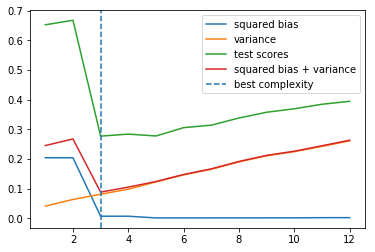

In [28]:
degrees = np.arange(MAX_POLY) + 1
best_degree = np.argmin(test_scores.mean(axis=0)) + 1
plt.plot(degrees, squared_bias, label='squared bias')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.plot(degrees, squared_bias + variance, label='squared bias + variance')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()

Train score vs test score

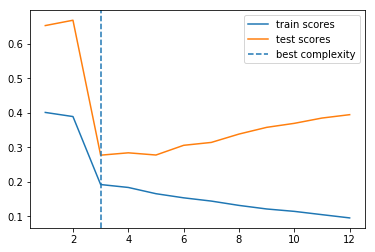

In [29]:
plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()